<a href="https://colab.research.google.com/github/JunLee1422/CBNU_2023254019_/blob/main/Computer%20vision/leaf_filtering_P1(%EC%9E%8E%EC%82%AC%EA%B7%80%EC%97%90_%EC%A0%81%EC%9A%A9_%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving healty.jpeg to healty (1).jpeg
Enter channel to histogram equalize (R, G, B): R


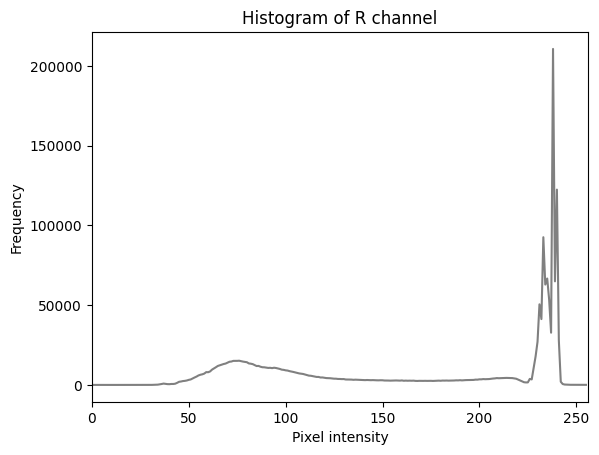

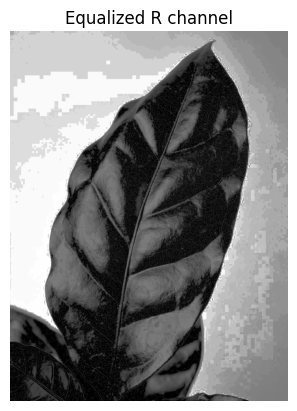

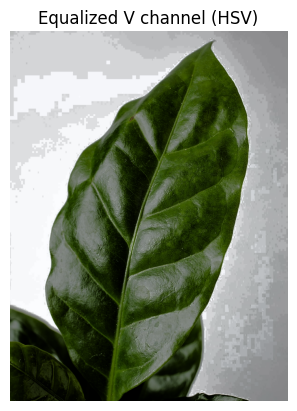

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'healty.jpeg'

# 이미지를 BGR로 읽어옴
image = cv2.imread(file_name)

# 이미지를 RGB로 변환
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 사용자로부터 R, G, B 중의 하나의 채널을 입력받음
while True:
    channel = input("Enter channel to histogram equalize (R, G, B): ").lower()

    # 입력받은 채널에 따라 채널 인덱스 설정
    if channel == 'r':
        channel_index = 0
        break
    elif channel == 'g':
        channel_index = 1
        break
    elif channel == 'b':
        channel_index = 2
        break
    else:
        print("Invalid channel! Please enter R, G, or B.")

# 입력받은 채널에 대한 히스토그램 계산
histogram = cv2.calcHist([image_rgb], [channel_index], None, [256], [0, 256])

# 히스토그램 시각화
plt.figure()
plt.title(f"Histogram of {channel.upper()} channel")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.plot(histogram, color='gray')
plt.xlim([0, 256])
plt.show()

# 입력받은 채널에 대한 평탄화
equalized_channel = cv2.equalizeHist(image[:, :, channel_index])

# 이미지 출력
plt.figure()
plt.imshow(equalized_channel, cmap='gray')
plt.title(f"Equalized {channel.upper()} channel")
plt.axis('off')
plt.show()

# RGB 이미지에서 HSV 이미지로 변환
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# V 채널에 대한 평탄화
image_hsv[:, :, 2] = cv2.equalizeHist(image_hsv[:, :, 2])

# HSV 이미지를 RGB로 다시 변환
equalized_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

# 이미지 출력
plt.figure()
plt.imshow(equalized_image)
plt.title("Equalized V channel (HSV)")
plt.axis('off')
plt.show()


Saving healty.jpeg to healty (4).jpeg


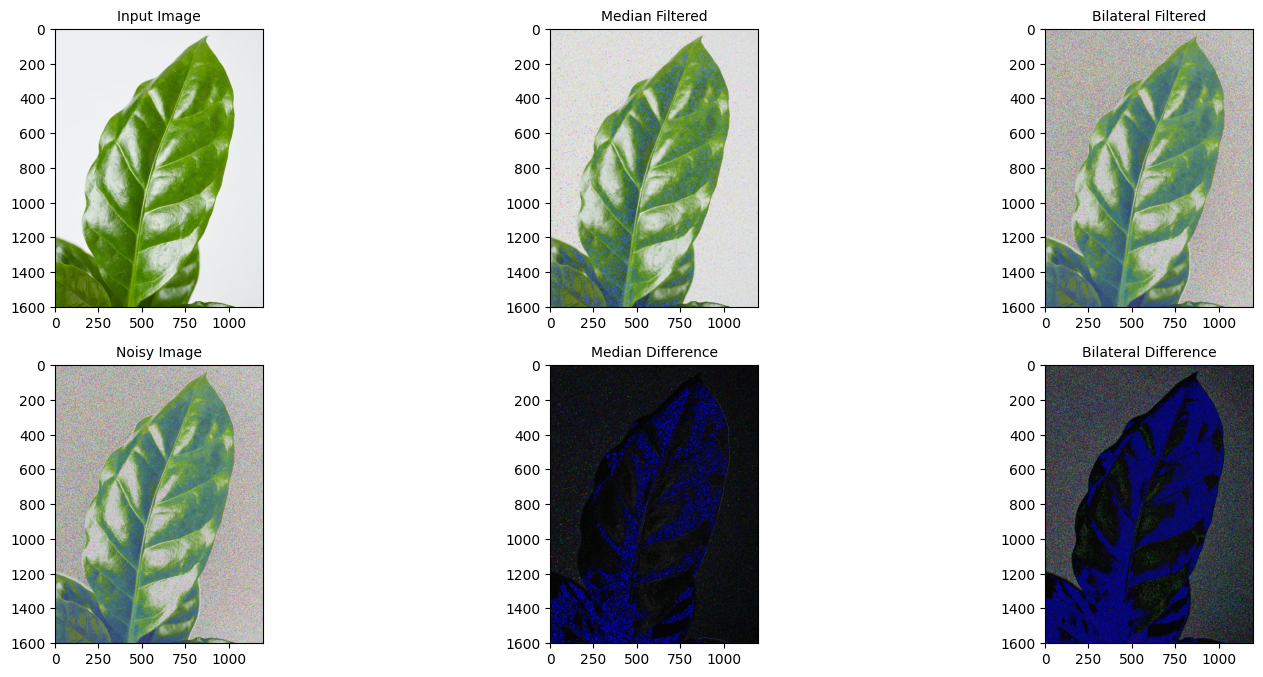

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'healty.jpeg'

# 이미지 읽기
input_image = cv2.imread(file_name)

# 입력 영상 복사하여 노이즈 추가용으로 사용
noisy_image = input_image.copy()

# 임의의 노이즈 추가 (예: 가우시안 노이즈)
noise = np.random.normal(0, 25, noisy_image.shape).astype(np.uint8)
noisy_image += noise

# 노이즈 제거 필터링 함수 정의
def filter_image(image, filter_name):
    if filter_name == "gaussian":
        return cv2.GaussianBlur(image, (5, 5), 0)
    elif filter_name == "median":
        return cv2.medianBlur(image, 5)
    elif filter_name == "bilateral":
        return cv2.bilateralFilter(image, 9, 75, 75)
    else:
        raise ValueError("잘못된 필터 이름입니다.")

# 각 필터 적용 및 결과 저장
filtered_images = {
    "gaussian": filter_image(noisy_image, "gaussian"),
    "median": filter_image(noisy_image, "median"),
    "bilateral": filter_image(noisy_image, "bilateral"),
}

# 각 결과와 입력 영상 사이의 절대값 차이 계산
def absolute_difference(image1, image2):
    return cv2.absdiff(image1, image2)

# 결과 이미지 및 절대값 차이 이미지 출력
plt.figure(figsize=(15, 10))

for filter_name, filtered_image in filtered_images.items():
    # 필터링 결과
    plt.subplot(3, 3, 1 + list(filtered_images.keys()).index(filter_name)), plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)), plt.title(f'{filter_name.capitalize()} Filtered', fontsize=10)
    # 절대값 차이
    difference_image = absolute_difference(input_image, filtered_image)
    plt.subplot(3, 3, 4 + list(filtered_images.keys()).index(filter_name)), plt.imshow(cv2.cvtColor(difference_image, cv2.COLOR_BGR2RGB)), plt.title(f'{filter_name.capitalize()} Difference', fontsize=10)

# 원본 이미지 및 노이즈 이미지 추가
plt.subplot(3, 3, 1), plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)), plt.title('Input Image', fontsize=10)
plt.subplot(3, 3, 4), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)), plt.title('Noisy Image', fontsize=10)

plt.tight_layout()  # subplot 간의 간격을 조절하여 제목이 겹치는 것을 방지
plt.show()


Saving healty.jpeg to healty (5).jpeg


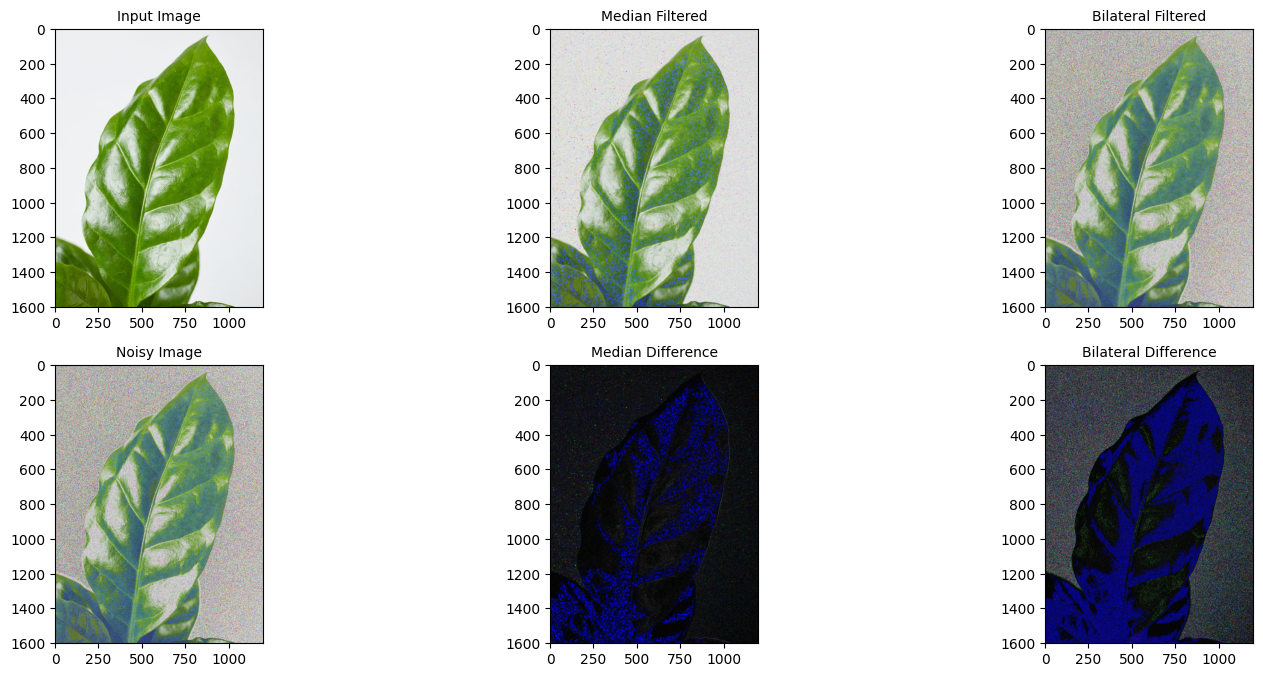

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

def add_noise_and_filter(file_name):
    # 이미지를 BGR로 읽어옴
    input_image = cv2.imread(file_name)

    # 입력 영상 복사하여 노이즈 추가용으로 사용
    noisy_image = input_image.copy()

    # 임의의 노이즈 추가 (예: 가우시안 노이즈)
    noise = np.random.normal(0, 25, noisy_image.shape).astype(np.uint8)
    noisy_image += noise

    # 노이즈 제거 필터링 함수 정의
    def filter_image(image, filter_name):
        if filter_name == "gaussian":
            return cv2.GaussianBlur(image, (5, 5), 0)
        elif filter_name == "median":
            return cv2.medianBlur(image, 5)
        elif filter_name == "bilateral":
            return cv2.bilateralFilter(image, 9, 75, 75)
        else:
            raise ValueError("잘못된 필터 이름입니다.")

    # 각 필터 적용 및 결과 저장
    filtered_images = {
        "gaussian": filter_image(noisy_image, "gaussian"),
        "median": filter_image(noisy_image, "median"),
        "bilateral": filter_image(noisy_image, "bilateral"),
    }

    # 각 결과와 입력 영상 사이의 절대값 차이 계산
    def absolute_difference(image1, image2):
        return cv2.absdiff(image1, image2)

    # 결과 이미지 및 절대값 차이 이미지 출력
    plt.figure(figsize=(15, 10))

    for filter_name, filtered_image in filtered_images.items():
        # 필터링 결과
        plt.subplot(3, 3, 1 + list(filtered_images.keys()).index(filter_name)), plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)), plt.title(f'{filter_name.capitalize()} Filtered', fontsize=10)
        # 절대값 차이
        difference_image = absolute_difference(input_image, filtered_image)
        plt.subplot(3, 3, 4 + list(filtered_images.keys()).index(filter_name)), plt.imshow(cv2.cvtColor(difference_image, cv2.COLOR_BGR2RGB)), plt.title(f'{filter_name.capitalize()} Difference', fontsize=10)

    # 원본 이미지 및 노이즈 이미지 추가
    plt.subplot(3, 3, 1), plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)), plt.title('Input Image', fontsize=10)
    plt.subplot(3, 3, 4), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)), plt.title('Noisy Image', fontsize=10)

    plt.tight_layout()  # subplot 간의 간격을 조절하여 제목이 겹치는 것을 방지
    plt.show()

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'healty.jpeg'  # 파일 이름을 원하는 파일 이름으로 수정하거나 업로드한 파일의 이름으로 변경

# 함수 호출
add_noise_and_filter(file_name)


Saving healty.jpeg to healty (6).jpeg
첫 번째 원의 반지름을 입력하세요 (0부터 600까지 가능): 300
두 번째 원의 반지름을 입력하세요 (300보다 작은 값): 150


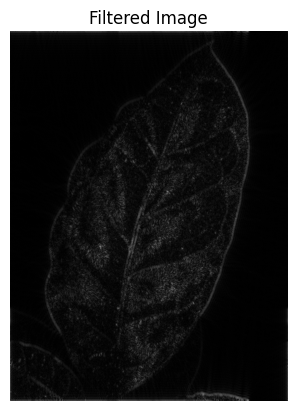

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'healty.jpeg'

# 이미지의 높이와 너비를 확인
height, width = image.shape[:2]

# 이미지를 그레이스케일로 변환
input_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 입력 영상의 DFT 계산
dft = cv2.dft(np.float32(input_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# 중심 좌표
center_row, center_col = height // 2, width // 2

# 사용자로부터 반지름 입력 받기
while True:
    radius1 = int(input("첫 번째 원의 반지름을 입력하세요 (0부터 {0}까지 가능): ".format(min(height, width) // 2)))
    radius2 = int(input("두 번째 원의 반지름을 입력하세요 ({0}보다 작은 값): ".format(radius1)))

    if radius1 <= min(height, width) // 2 and radius2 < radius1:
        break
    else:
        print("Invalid input! Please enter valid radii.")

# 첫 번째 원 그리기
mask1 = np.zeros((height, width, 2), np.uint8)
cv2.circle(mask1, (center_col, center_row), radius1, (1, 1), -1)

# 두 번째 원 그리기
mask2 = np.zeros((height, width, 2), np.uint8)
cv2.circle(mask2, (center_col, center_row), radius2, (1, 1), -1)

# 두 원 사이의 부분 선택 (band pass 필터링)
mask = mask2 - mask1

# DFT 결과에 마스크 적용
filtered_dft = dft_shift * mask

# 역 DFT 적용하여 주파수 도메인에서 공간 도메인으로 변환
filtered_image = cv2.idft(np.fft.ifftshift(filtered_dft))
filtered_image_magnitude = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# 결과를 0과 255 사이의 값으로 스케일링
min_val, max_val = np.min(filtered_image_magnitude), np.max(filtered_image_magnitude)
filtered_image_scaled = (filtered_image_magnitude - min_val) / (max_val - min_val) * 255

# 결과 출력
plt.imshow(filtered_image_scaled, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')
plt.show()


Saving diasese.jpeg to diasese (3).jpeg
이진화 방법을 선택하세요 (1: Otsu, 2: Adaptive Median): 1
모폴로지 연산을 선택하세요 (1: Erosion, 2: Dilation, 3: Opening, 4: Closing): 1
모폴로지 연산을 적용할 횟수를 입력하세요: 1


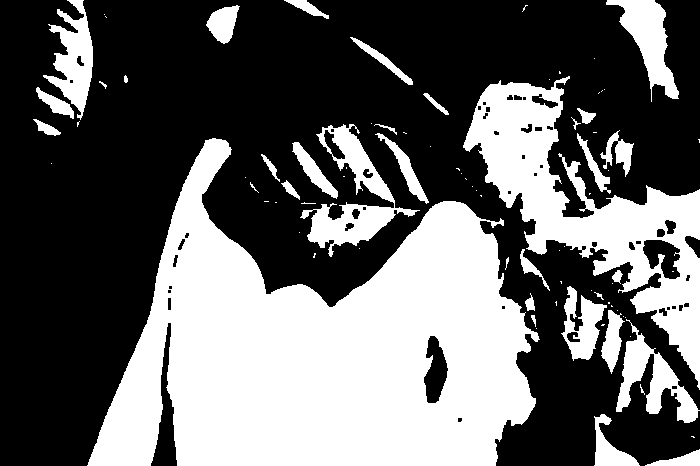

-1

In [ ]:
import cv2
import numpy as np

from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'diasese.jpeg'

# 이미지 읽기
input_image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# 사용자로부터 이진화 방법 선택 받기
while True:
    threshold_method = input("이진화 방법을 선택하세요 (1: Otsu, 2: Adaptive Median): ")
    if threshold_method in ["1", "2"]:
        break
    else:
        print("올바른 선택이 아닙니다. 다시 입력하세요.")

if threshold_method == "1":
    # Otsu 이진화 적용
    _, binary_image = cv2.threshold(input_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
elif threshold_method == "2":
    # Adaptive Median 이진화 적용
    binary_image = cv2.adaptiveThreshold(input_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# 사용자로부터 모폴로지 연산 선택 받기
while True:
    morphology_operation = input("모폴로지 연산을 선택하세요 (1: Erosion, 2: Dilation, 3: Opening, 4: Closing): ")
    if morphology_operation in ["1", "2", "3", "4"]:
        break
    else:
        print("올바른 선택이 아닙니다. 다시 입력하세요.")

# 횟수 입력 받기
while True:
    try:
        iterations = int(input("모폴로지 연산을 적용할 횟수를 입력하세요: "))
        iterations = max(iterations, 0)  # 음수 값 방지
        break
    except ValueError:
        print("정수를 입력하세요.")

# 모폴로지 연산에 사용될 커널 정의
kernel = np.ones((3, 3), np.uint8)

# 선택된 모폴로지 연산 적용
if morphology_operation == "1":
    # Erosion 적용
    morphological_result = cv2.erode(binary_image, kernel, iterations=iterations)
elif morphology_operation == "2":
    # Dilation 적용
    morphological_result = cv2.dilate(binary_image, kernel, iterations=iterations)
elif morphology_operation == "3":
    # Opening 적용
    morphological_result = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=iterations)
elif morphology_operation == "4":
    # Closing 적용
    morphological_result = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=iterations)

from google.colab.patches import cv2_imshow

# 결과 출력
cv2_imshow(morphological_result)
cv2.waitKey(0)



Saving diasese.jpeg to diasese (5).jpeg


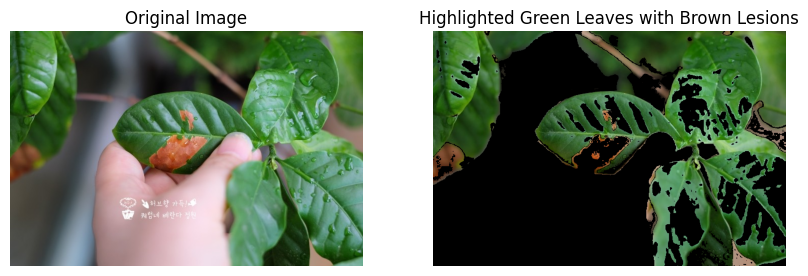

In [ ]:
#변경코드

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'diasese.jpeg'

# 이미지 읽기
image = cv2.imread(file_name)

# 이미지를 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 초록색 범위 정의 (HSV 색상 범위)
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])

# 갈색 범위 정의 (HSV 색상 범위)
lower_brown = np.array([10, 60, 20])
upper_brown = np.array([30, 255, 200])

# 초록색 영역과 갈색 영역을 감지하여 마스크 생성
green_mask = cv2.inRange(hsv, lower_green, upper_green)
brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

# 초록색 영역과 갈색 영역 결합
result_mask = cv2.bitwise_or(green_mask, brown_mask)

# 결과 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
result_image = cv2.bitwise_and(image, image, mask=result_mask)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Highlighted Green Leaves with Brown Lesions')
plt.axis('off')

plt.show()


Saving leafd.jpg to leafd.jpg


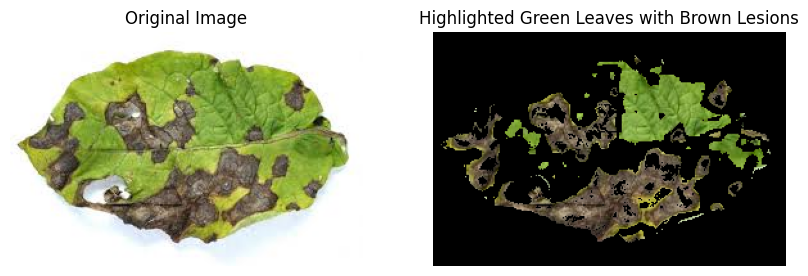

In [ ]:
#값 조정
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'leafd.jpg'

# 이미지 읽기
image = cv2.imread(file_name)

# 이미지를 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 초록색 범위 정의 (HSV 색상 범위)
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])

# 갈색 범위 정의 (HSV 색상 범위)
lower_brown = np.array([0, 50, 20])
upper_brown = np.array([30, 255, 200])

# 초록색 영역과 갈색 영역을 감지하여 마스크 생성
green_mask = cv2.inRange(hsv, lower_green, upper_green)
brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

# 초록색 영역과 갈색 영역 결합
result_mask = cv2.bitwise_or(green_mask, brown_mask)

# 결과 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
result_image = cv2.bitwise_and(image, image, mask=result_mask)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Highlighted Green Leaves with Brown Lesions')
plt.axis('off')

plt.show()


Saving leafd.jpg to leafd (1).jpg


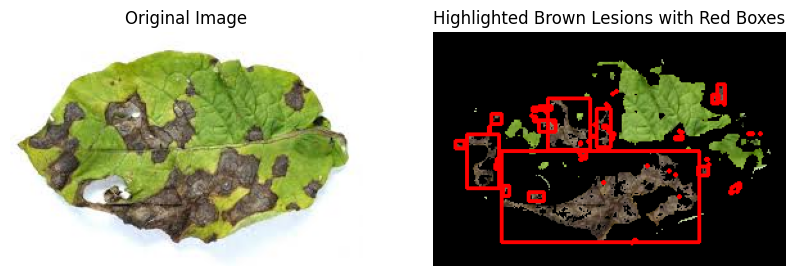

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'leafd.jpg'

# 이미지 읽기
image = cv2.imread(file_name)

# 이미지를 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 초록색 범위 정의 (HSV 색상 범위)
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])

# 갈색 범위 정의 (HSV 색상 범위)
lower_brown = np.array([0, 50, 20])
upper_brown = np.array([20, 230, 160])

# 초록색 영역과 갈색 영역을 감지하여 마스크 생성
green_mask = cv2.inRange(hsv, lower_green, upper_green)
brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

# 초록색 영역과 갈색 영역만 결합
result_mask = cv2.bitwise_or(green_mask, brown_mask)

# 초록색과 갈색 이외의 부분을 검정색으로 설정
result_image = cv2.bitwise_and(image, image, mask=result_mask)
result_image[result_image == 0] = 0

# 갈색 부분에 붉은색 상자 그리기
contours, _ = cv2.findContours(brown_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# 결과 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Highlighted Brown Lesions with Red Boxes')
plt.axis('off')

plt.show()



Saving healty.jpeg to healty (7).jpeg
질병이 감지되지 않았습니다.


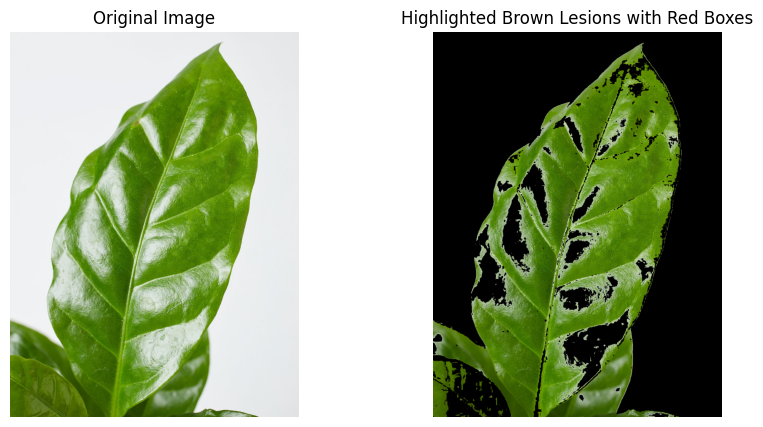

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드한 파일 이름 입력
file_name = 'healty.jpeg'

# 이미지 읽기
image = cv2.imread(file_name)

# 이미지를 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 초록색 범위 정의 (HSV 색상 범위)
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])

# 갈색 범위 정의 (HSV 색상 범위)
lower_brown = np.array([0, 50, 20])
upper_brown = np.array([20, 230, 160])

# 초록색 영역과 갈색 영역을 감지하여 마스크 생성
green_mask = cv2.inRange(hsv, lower_green, upper_green)
brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

# 초록색 영역과 갈색 영역만 결합
result_mask = cv2.bitwise_or(green_mask, brown_mask)

# 초록색과 갈색 이외의 부분을 검정색으로 설정
result_image = cv2.bitwise_and(image, image, mask=result_mask)
result_image[result_image == 0] = 0

# 갈색 부분에 붉은색 상자 그리기
contours, _ = cv2.findContours(brown_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
disease_pixels = 0
total_pixels = np.count_nonzero(result_mask)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h
    disease_pixels += area

# 질병으로 판정하는 비율 계산
disease_ratio = (disease_pixels / total_pixels) * 100

# 질병 판정
if disease_ratio >= 10:
    print("질병이 감지되었습니다.")
else:
    print("질병이 감지되지 않았습니다.")

# 결과 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Highlighted Brown Lesions with Red Boxes')
plt.axis('off')

plt.show()
